In [2]:
from tqdm.auto import tqdm

import os
import requests
import zipfile
import cv2
import math
import matplotlib.pyplot as plt
import glob
import numpy as np
import random
import seaborn as sns
import pandas as pd 

from PIL import Image

In [3]:
import yaml
with open('E:/BioM/archive/BrainTumor/BrainTumorYolov11/data.yaml','r') as f:
    class_names=yaml.safe_load(f)['names']
    print(class_names)

['glioma', 'meningioma', 'pituitary']


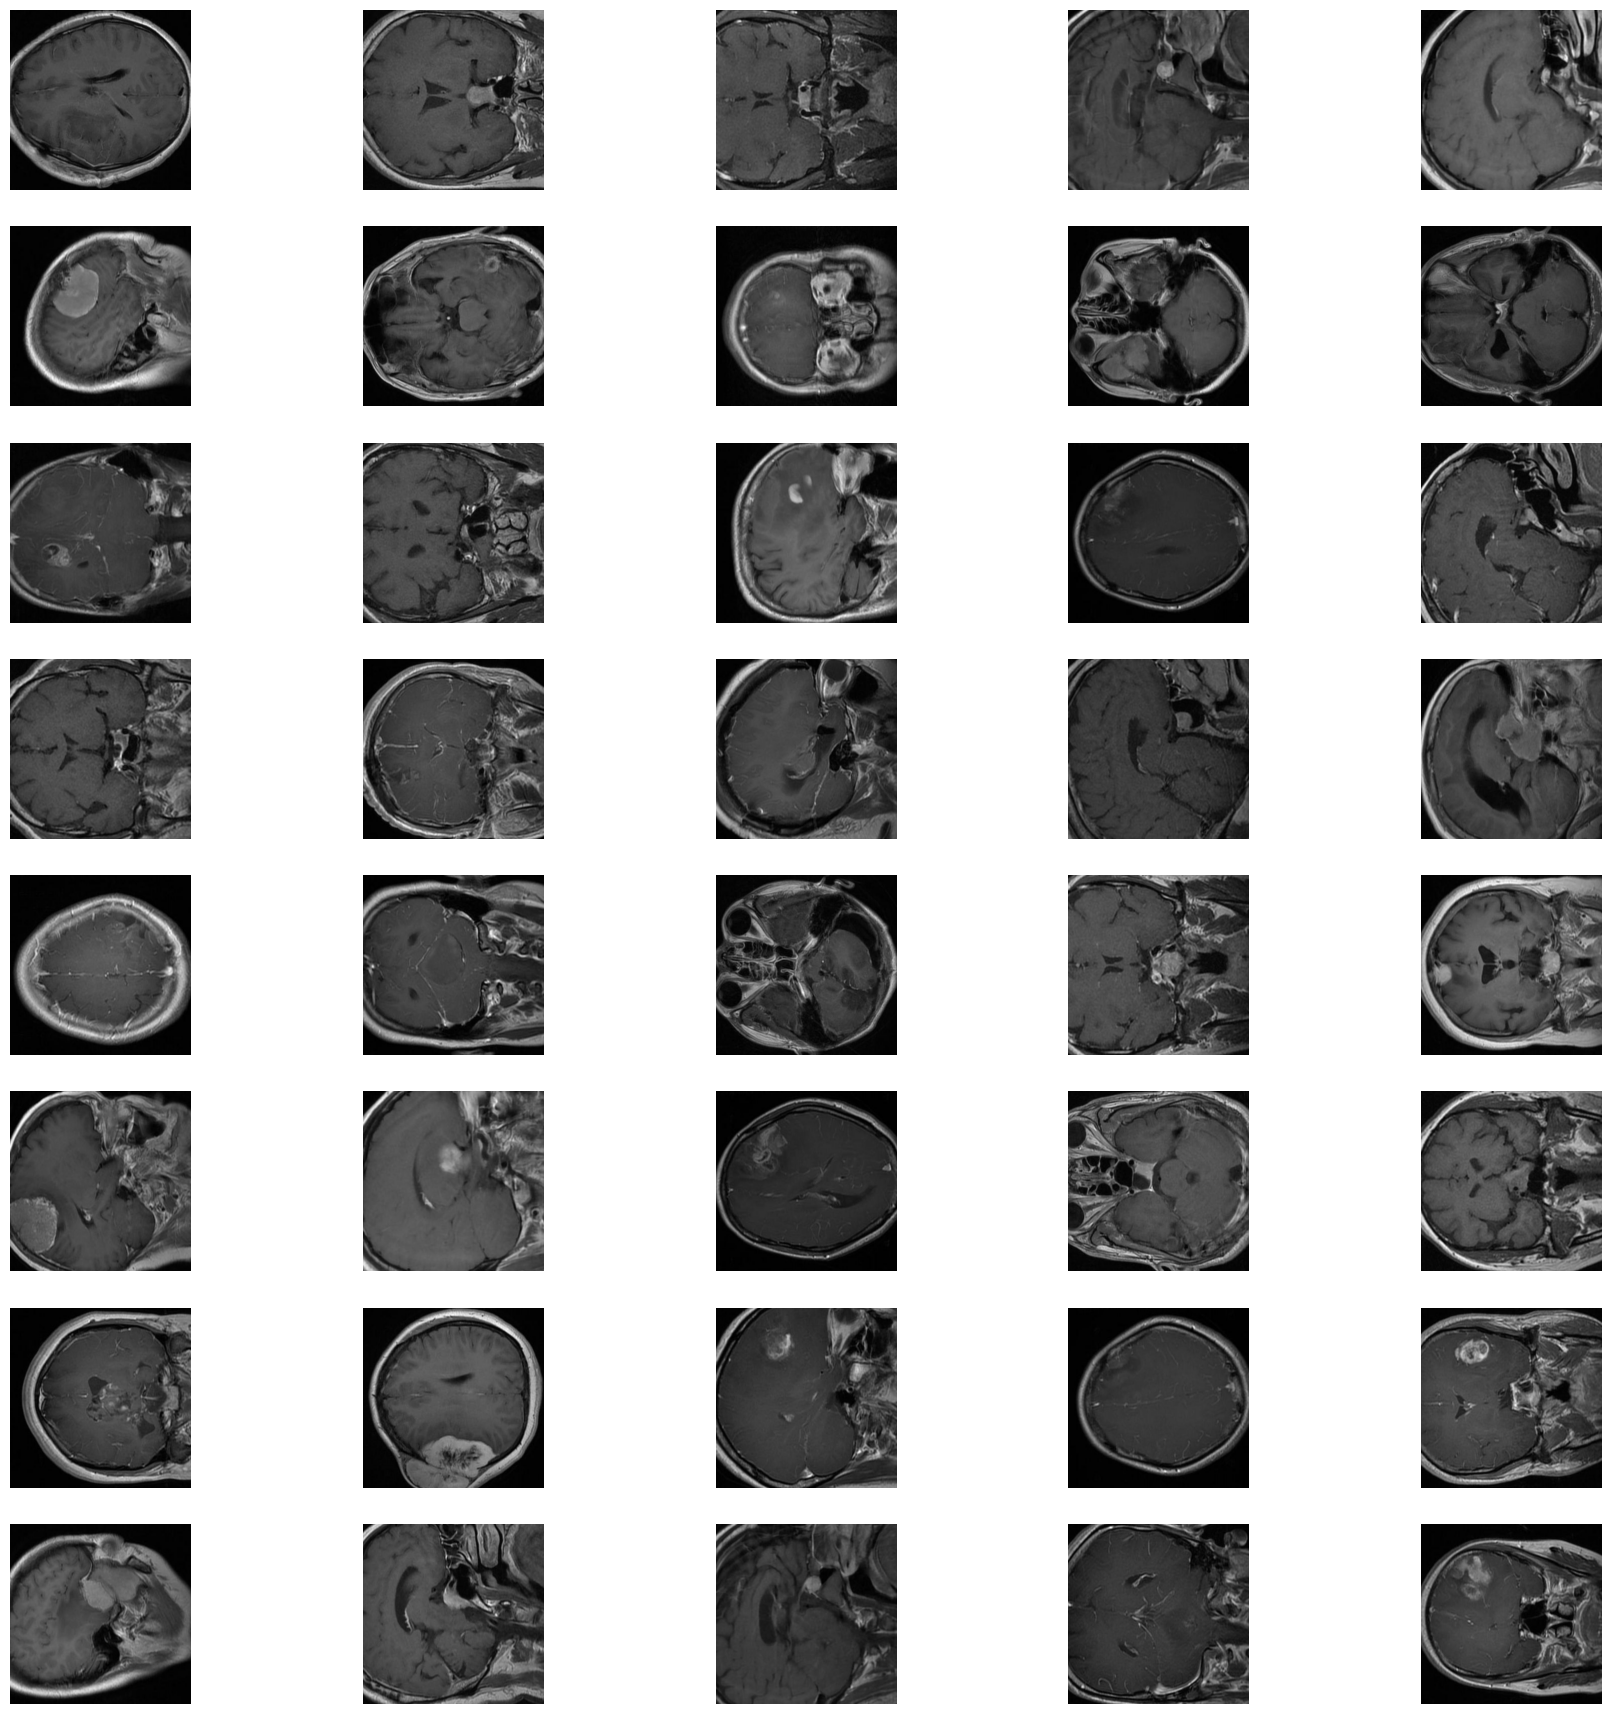

In [5]:
import random
import cv2
import os
import matplotlib.pyplot as plt

image_dir = 'E:/BioM/archive/BrainTumor/BrainTumorYolov11/train/images'
label_files = 'E:/BioM/archive/BrainTumor/BrainTumorYolov11/train/labels'

image_files = os.listdir(image_dir)
random_images = random.sample(image_files, 40)

fig, axs = plt.subplots(8, 5, figsize=(22, 22))  
axs = axs.flatten() 

for i, image_file in enumerate(random_images):
    image_path = os.path.join(image_dir, image_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(label_files, label_file)
    
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            labels = f.read().strip().split("\n")

        for label in labels:
            if len(label.split()) != 5: 
                continue
            class_id, x_center, y_center, width, height = map(float, label.split())
            x_min = int((x_center - width / 2) * image.shape[1])
            y_min = int((y_center - height / 2) * image.shape[0])
            x_max = int((x_center + width / 2) * image.shape[1])
            y_max = int((y_center + height / 2) * image.shape[0])

            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)

            text_scale = max(0.5, min(image.shape[1], image.shape[0]) / 700)
            text_thickness = max(1, int(text_scale * 2))
            classe = class_names[int(class_id)]  
            cv2.putText(
                image,
                classe,
                (x_min, max(y_min - 10, 0)),
                cv2.FONT_HERSHEY_SIMPLEX,
                text_scale,
                (0, 0, 255),
                text_thickness,
                cv2.LINE_AA,
            )
    
    axs[i].imshow(image)
    axs[i].axis('off')

plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

In [6]:
from ultralytics import YOLO
model=YOLO('yolo11s.pt')

Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\moonw\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 18.4M/18.4M [00:09<00:00, 2.11MB/s]


In [10]:
model.train(
   data='E:/BioM/archive/BrainTumor/BrainTumorYolov11/data.yaml',
   imgsz=64,
   epochs=10,
   batch=256)

Ultralytics 8.3.74  Python-3.12.6 torch-2.5.1+cpu CPU (Intel Core(TM) i7-8565U 1.80GHz)
engine\trainer: task=detect, mode=train, model=yolo11s.pt, data=E:/BioM/archive/BrainTumor/BrainTumorYolov11/data.yaml, epochs=10, time=None, patience=100, batch=256, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labe

train: Scanning E:\BioM\archive\BrainTumor\BrainTumorYolov11\train\labels.cache... 2144 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2144/2144 [00:00<?, ?it/s]

WARNING  Box and segment counts should be equal, but got len(segments) = 2143, len(boxes) = 2144. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning E:\BioM\archive\BrainTumor\BrainTumorYolov11\valid\labels.cache... 612 images, 0 backgrounds, 0 corrupt: 100%|██████████| 612/612 [00:00<?, ?it/s]


Plotting labels to runs\detect\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.002), 87 bias(decay=0.0)
Image sizes 64 train, 64 val
Using 0 dataloader workers
Logging results to runs\detect\train4
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      2.242        2.4      1.343         96         64: 100%|██████████| 9/9 [01:20<00:00,  8.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.28s/it]

                   all        612        612      0.471      0.332      0.338      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.794      1.449      1.029         95         64: 100%|██████████| 9/9 [01:04<00:00,  7.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:12<00:00,  6.27s/it]

                   all        612        612      0.394      0.452      0.373      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.697      1.254     0.9897         92         64: 100%|██████████| 9/9 [00:56<00:00,  6.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.51s/it]

                   all        612        612      0.505      0.416      0.373       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.683      1.193     0.9801         96         64: 100%|██████████| 9/9 [00:52<00:00,  5.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.45s/it]

                   all        612        612      0.552      0.436      0.435      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G       1.65      1.128     0.9708         96         64: 100%|██████████| 9/9 [00:49<00:00,  5.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.73s/it]

                   all        612        612      0.564      0.508      0.503      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.607      1.062     0.9547         94         64: 100%|██████████| 9/9 [01:15<00:00,  8.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.97s/it]

                   all        612        612      0.692      0.595      0.644      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.589      1.021     0.9524         96         64: 100%|██████████| 9/9 [00:57<00:00,  6.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.46s/it]

                   all        612        612      0.669      0.584      0.612      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      1.561     0.9955     0.9458         96         64: 100%|██████████| 9/9 [00:57<00:00,  6.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.85s/it]

                   all        612        612      0.689      0.605      0.643      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      1.496     0.9354     0.9328         96         64: 100%|██████████| 9/9 [00:49<00:00,  5.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:12<00:00,  6.16s/it]

                   all        612        612      0.701      0.563      0.626      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      1.465     0.9287      0.928         96         64: 100%|██████████| 9/9 [00:53<00:00,  5.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.67s/it]

                   all        612        612      0.768      0.619      0.682        0.4



10 epochs completed in 0.209 hours.
Optimizer stripped from runs\detect\train4\weights\last.pt, 19.1MB
Optimizer stripped from runs\detect\train4\weights\best.pt, 19.1MB

Validating runs\detect\train4\weights\best.pt...
Ultralytics 8.3.74  Python-3.12.6 torch-2.5.1+cpu CPU (Intel Core(TM) i7-8565U 1.80GHz)
YOLO11s summary (fused): 238 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.65s/it]


                   all        612        612      0.769      0.618      0.682        0.4
                glioma        285        285       0.72      0.439      0.542      0.268
            meningioma        142        142      0.907      0.754      0.848      0.587
             pituitary        185        185      0.678       0.66      0.655      0.344
Speed: 0.1ms preprocess, 10.5ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs\detect\train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002AB4B340110>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          

In [11]:
metrics = model.val(split='val')

print(f"Mean Average Precision @.5:.95 : {metrics.box.map}")    
print(f"Mean Average Precision @ .50   : {metrics.box.map50}") 
print(f"Mean Average Precision @ .70   : {metrics.box.map75}")
print("recall : ",metrics.box.r)
print(metrics.box.f1)
print(metrics.box.maps)

Ultralytics 8.3.74  Python-3.12.6 torch-2.5.1+cpu CPU (Intel Core(TM) i7-8565U 1.80GHz)
YOLO11s summary (fused): 238 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs


val: Scanning E:\BioM\archive\BrainTumor\BrainTumorYolov11\valid\labels.cache... 612 images, 0 backgrounds, 0 corrupt: 100%|██████████| 612/612 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:19<00:00,  6.56s/it]


                   all        612        612      0.769      0.618      0.682        0.4
                glioma        285        285       0.72      0.439      0.542      0.268
            meningioma        142        142      0.907      0.754      0.848      0.587
             pituitary        185        185      0.678       0.66      0.655      0.344
Speed: 0.1ms preprocess, 18.1ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs\detect\train42
Mean Average Precision @.5:.95 : 0.3998856551685942
Mean Average Precision @ .50   : 0.6819197981222925
Mean Average Precision @ .70   : 0.42939379328867
recall :  [     0.4386     0.75352     0.66049]
[    0.54525      0.8233     0.66918]
[    0.26774     0.58747     0.34445]


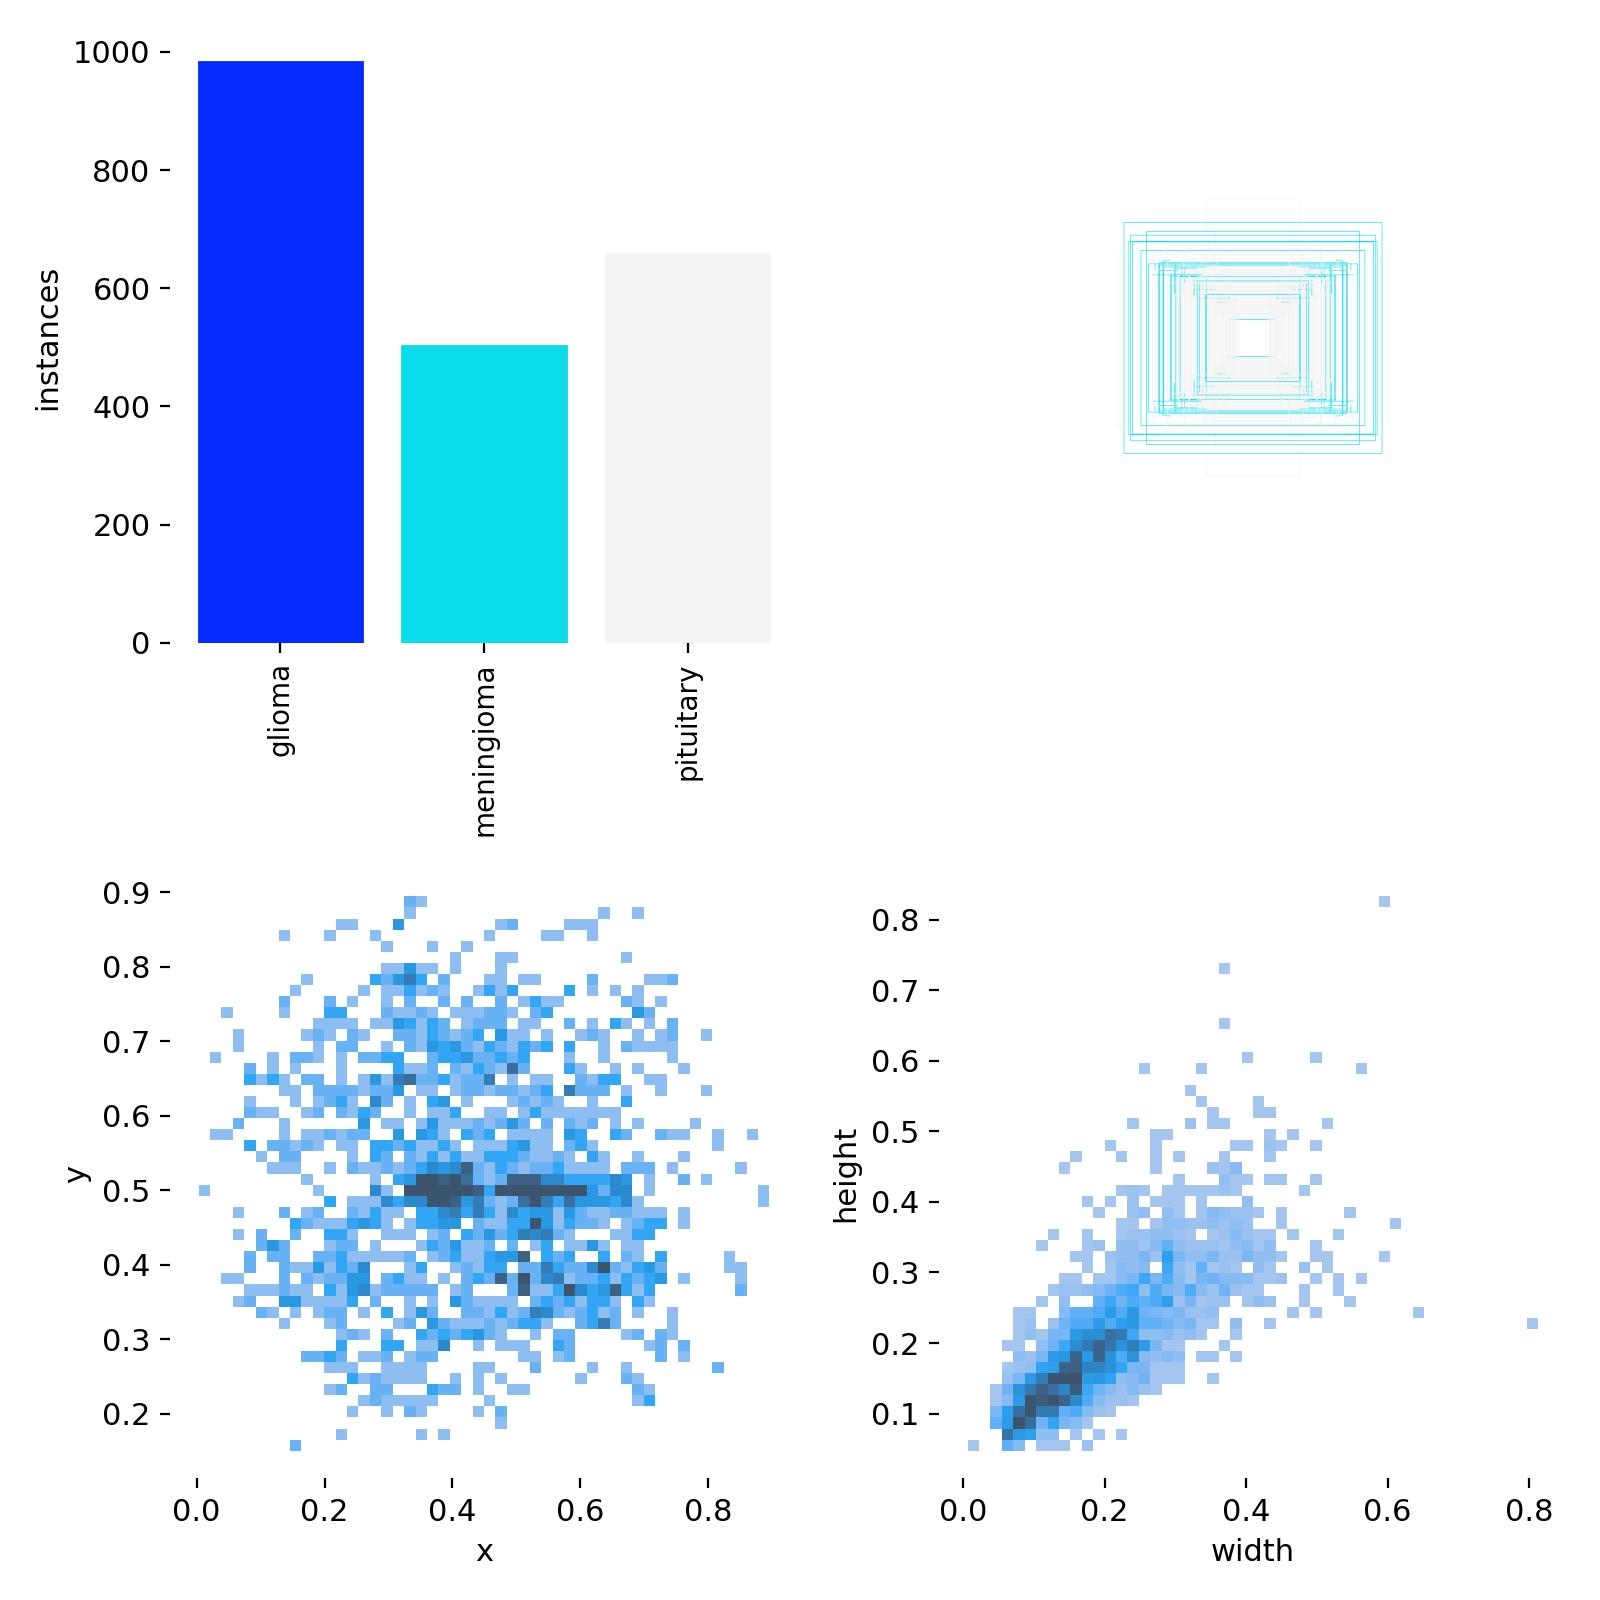

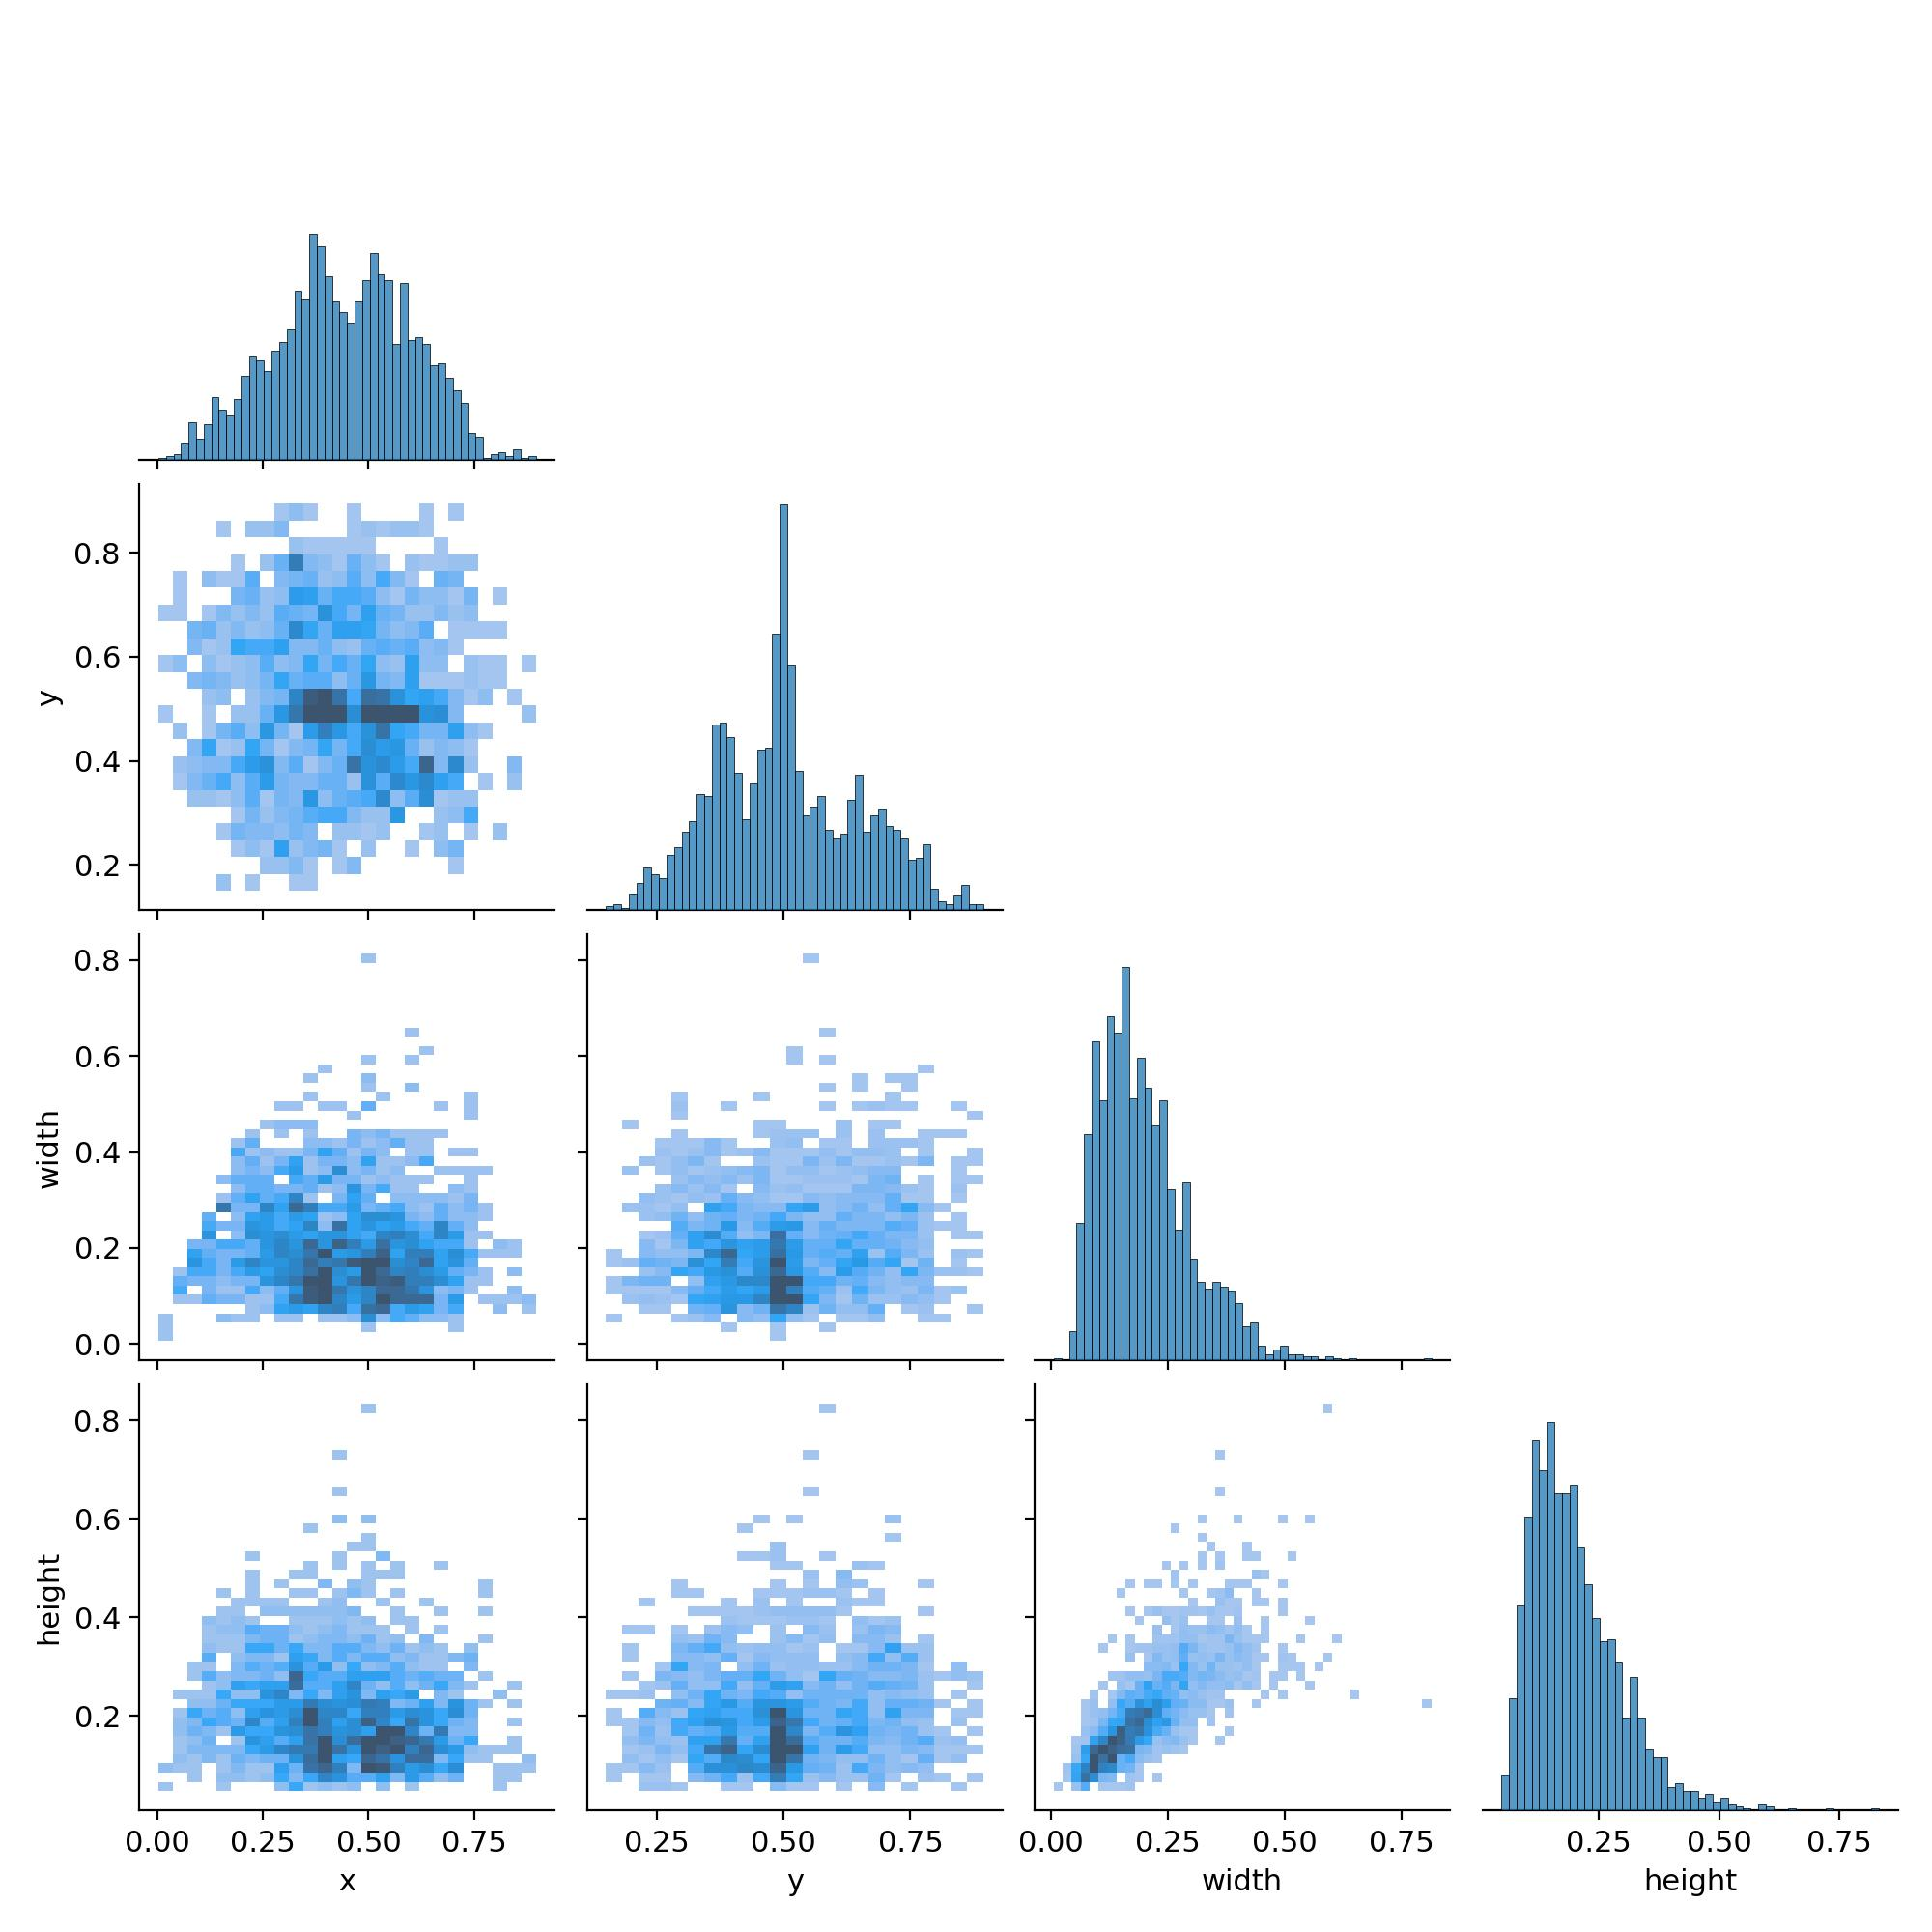

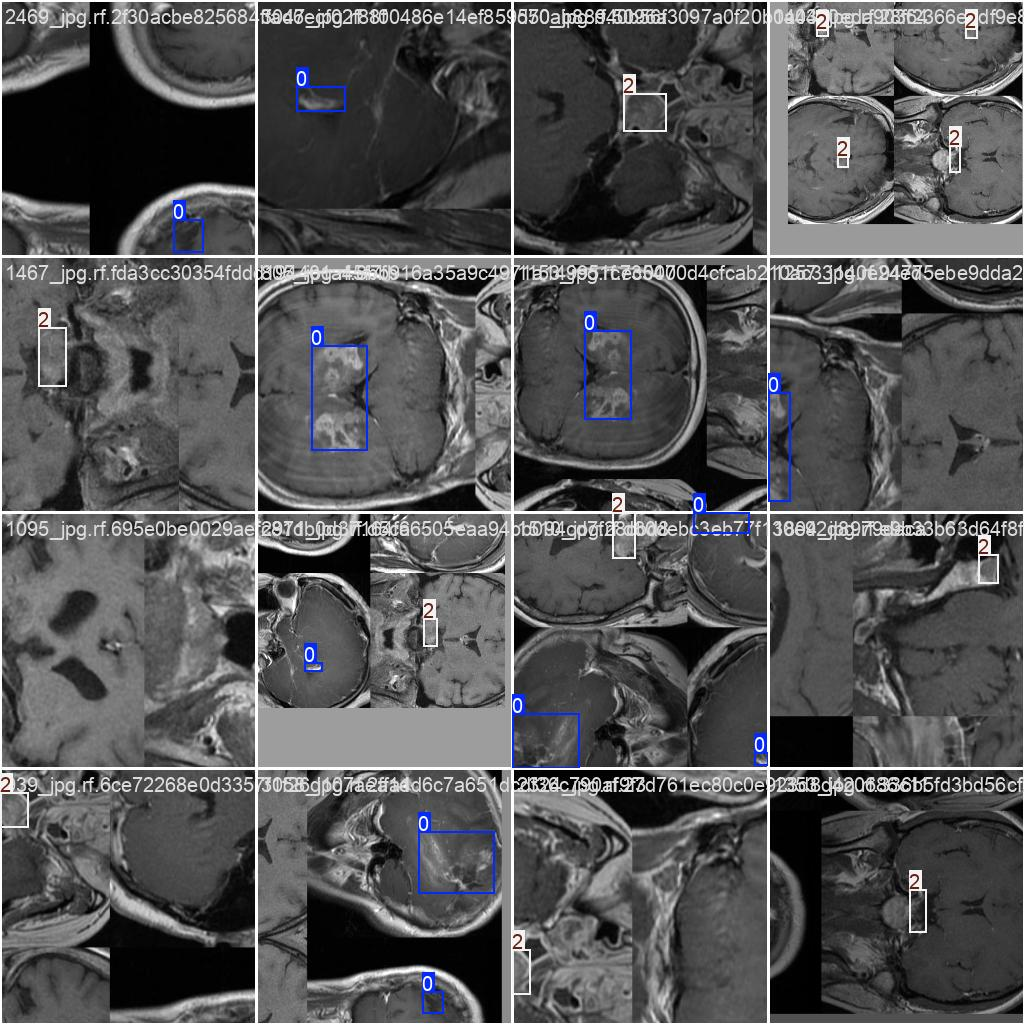

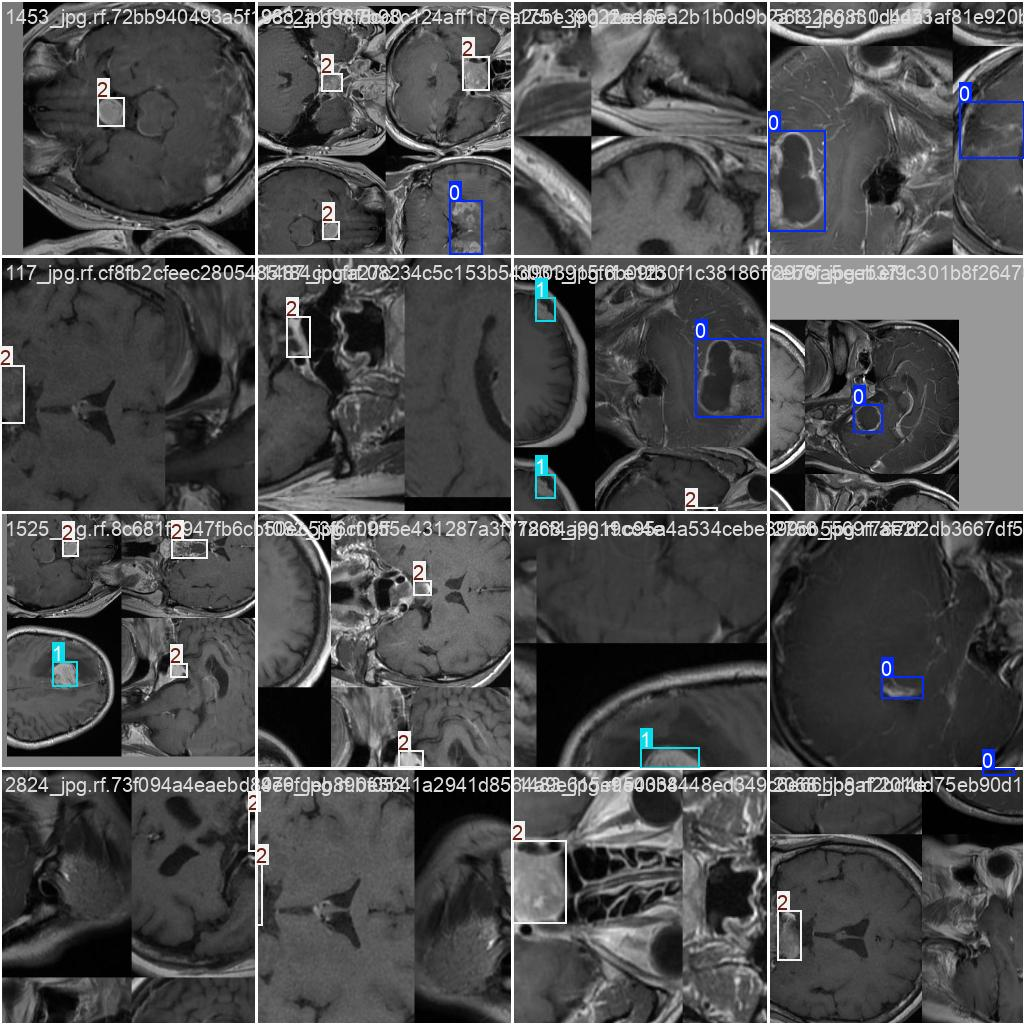

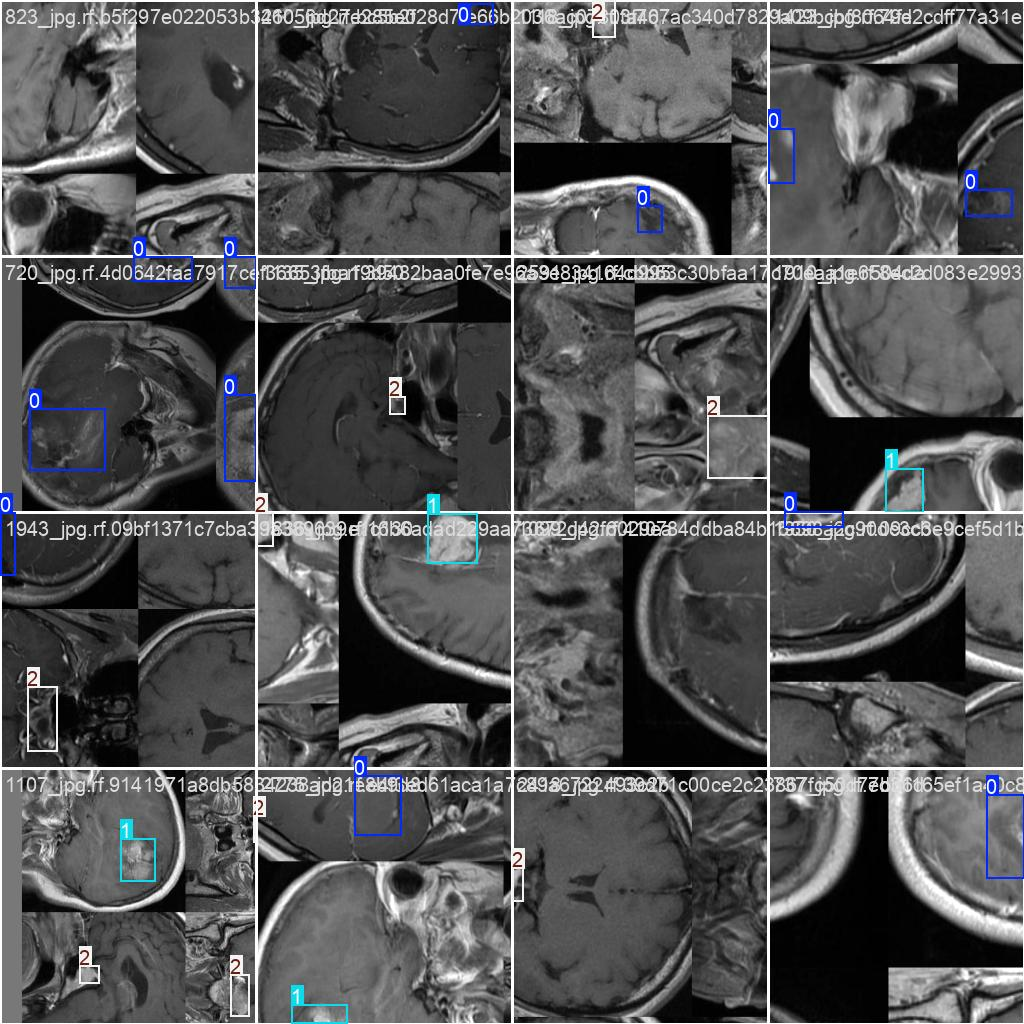

In [16]:
from IPython.display import Image,display
path='E:/BioM/archive/BrainTumor/runs/detect/train'
image=[f for f in os.listdir(path) if f.endswith(('.jpg','.png','.jpeg'))]
for i in image:
    display(Image(os.path.join(path,i)))